Preparing 

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import pickle
import random
from tqdm import tqdm

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


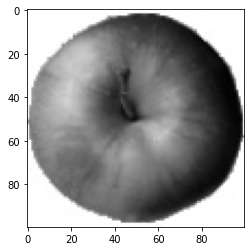

In [34]:
datadir = "/content/drive/MyDrive/ML_Project/Fruits_Classification_Project/data/Training"
categories = ["Apple Red 2", "Avocado", "Banana", "Cherry 2", "Grape Pink", "Litchi", "Orange", "Peach", "Pineapple" ,"Strawberry"]
IMG_SIZE = 100

# get one picture in data
for category in categories:
  path = os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    print(new_array)
    plt.imshow(new_array, cmap = 'gray')
    plt.show()
    break
  break

In [35]:
#Create_training_data
training_data = []

def create_training_data():
    for category in categories:  

        path = os.path.join(datadir,category)  
        class_num = categories.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
create_training_data()

print(len(training_data))


100%|██████████| 492/492 [00:01<00:00, 261.94it/s]

5082


7
8
8
8
7
9
0
7
4
3


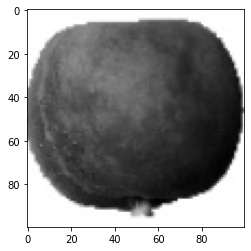

In [36]:
#random selection of data in training_data to check

random.shuffle(training_data)
sample = training_data[0]
plt.imshow(sample[0], cmap='gray')
for sample in training_data[:10]:
    print(sample[1])



In [37]:
# saving (x: picture), (y: label)

x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

print('x:',x.shape)
print('y:',y.shape)

x: (5082, 100, 100, 1)
y: (5082,)


In [38]:
#Save x, y as file.pickle into drive
pickle_out = open("/content/drive/MyDrive/ML_Project/Fruits_Classification_Project/Save/x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/ML_Project/Fruits_Classification_Project/Save/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Build model

In [39]:
import keras
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPool2D, Conv2D
from keras.utils import np_utils

In [40]:
pickle_in = open("/content/drive/MyDrive/ML_Project/Fruits_Classification_Project/Save/x.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("/content/drive/MyDrive/ML_Project/Fruits_Classification_Project/Save/y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

print('X:',X.shape)
print('y:',y.shape)

X: (5082, 100, 100, 1)
y: (5082,)


Original y data  7
one-hot encoding y data  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


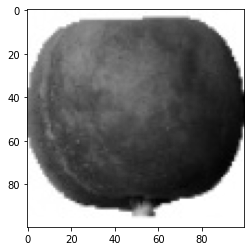

In [41]:
num_classes = 10

#One hot encoding Y
Y = np_utils.to_categorical(y,10)
print("Original y data ", y[7])
print("one-hot encoding y data ", Y[7])
plt.imshow(np.squeeze(X[7].reshape(100,100,1)), cmap = 'gray')

In [42]:
name = 'fruits_classifer_model'
model = Sequential()

#layer1
model.add(Conv2D(32,(3,3), padding='same', activation = 'relu', input_shape = (100,100,1)))
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Dropout(0.2))

#layer2
model.add(Conv2D(64,(3,3),padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Dropout(0.2))

#layer3
model.add(Conv2D(128,(3,3),padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Dropout(0.2))

#FCN layer
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

H = model.fit(X, Y, batch_size = 16, epochs = 3, verbose = 1, validation_split = 0.2)

Epoch 1/3
255/255 [==============================] - 98s 350ms/step - loss: 0.7937 - accuracy: 0.7198 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2/3
255/255 [==============================] - 88s 347ms/step - loss: 0.0080 - accuracy: 0.9981 - val_loss: 3.2449e-04 - val_accuracy: 1.0000
Epoch 3/3
255/255 [==============================] - 88s 347ms/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 1.6921e-04 - val_accuracy: 1.0000


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0

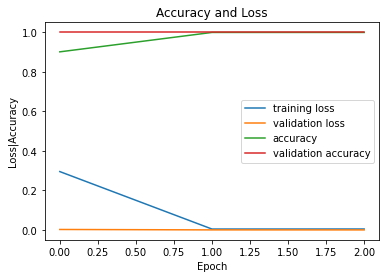

In [43]:
fig = plt.figure()
numOfEpoch = 3
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
model.summary()

In [44]:
#Save model to drive
model.save('/content/drive/MyDrive/ML_Project/Fruits_Classification_Project/Save/Fruits_Classification.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_Project/Fruits_Classification_Project/Save/Fruits_Classification.model/assets


Test_Model

In [45]:
import tensorflow as tf
from keras.preprocessing import image
from keras.models import load_model

In [46]:
#Load model from drive
model = load_model('/content/drive/MyDrive/ML_Project/Fruits_Classification_Project/Save/Fruits_Classification.model')

#Check model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0

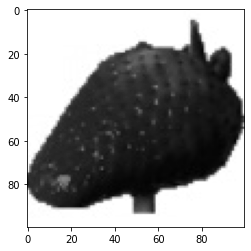

Show processing image


In [55]:
#select link drive of image to test
img_test = '/content/drive/MyDrive/ML_Project/Fruits_Classification_Project/data/Testing/Strawberry.jpg'

#process image before classification

categories = ["Apple Red 2", "Avocado", "Banana", "Cherry 2", "Grape Pink", "Litchi", "Orange", "Peach", "Pineapple" ,"Strawberry"]
def prepare(filepath):
  IMG_SIZE = 100
  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (100,100))
  new_array = new_array/255.0
  return new_array.reshape(-1,100,100,1)

#show processing image
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()
print('Show processing image')


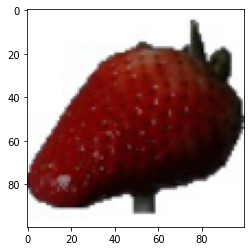

[[9.8181092e-24 4.4824391e-16 1.5152921e-21 3.0382799e-12 5.2515595e-27
  3.2185004e-21 3.0437243e-32 3.6473716e-14 4.5115665e-24 1.0000000e+00]]
Predicted value: 9
Name of fruit: Strawberry
Prediction: 1.0


In [56]:
#create color image to show when classify object

img1 = image.load_img(img_test, target_size=(100, 100))
img1_tensor = image.img_to_array(img1)
img1_tensor = np.expand_dims(img1_tensor, axis=0)
img1_tensor /= 255.0

#classify object
plt.imshow(np.squeeze(img1_tensor))
plt.show()

prediction = model.predict([prepare(img_test)])
print(prediction)
print('Predicted value: ' + str(np.argmax(prediction)))
print('Name of fruit: ' + str(categories[int(np.argmax(prediction))]))
print('Prediction: ' + str(np.max(prediction)))
